# LOAN DATA

In [1]:
import pandas as pd
import numpy as np

### Load Data

In [2]:
df = pd.read_csv('C:/DATA ANALYST/A Final Project/loan.csv')

In [3]:
df.shape

(615, 13)

### Understand Data

In [4]:
df.head()

,UID,Marital_status,Dependents,Is_graduate,Income,Loan_amount,Term_months,Credit_score,approval_status,Age,Sex,Purpose,Hobby
0,LP001002,NO,0,Graduate,45848,NaN,360.0,1.0,0,40.0,Male,Education,Reading
1,LP001002,NO,0,Graduate,45848,NaN,360.0,1.0,0,40.0,Male,Education,Reading
2,LP001003,YES,1,Graduate,15325,128.0,360.0,1.0,1,22.0,Male,Education,Reading
3,LP001005,YES,0,Graduate,29105,66.0,360.0,1.0,0,27.0,Male,Education,Reading
4,LP001006,YES,0,Not Graduate,42944,120.0,360.0,1.0,0,36.0,F,Education,Reading


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UID              615 non-null    object 
 1   Marital_status   613 non-null    object 
 2   Dependents       600 non-null    object 
 3   Is_graduate      613 non-null    object 
 4   Income           615 non-null    int64  
 5   Loan_amount      592 non-null    float64
 6   Term_months      601 non-null    float64
 7   Credit_score     565 non-null    float64
 8   approval_status  615 non-null    int64  
 9   Age              609 non-null    float64
 10  Sex              602 non-null    object 
 11  Purpose          615 non-null    object 
 12  Hobby            615 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.6+ KB


In [65]:
df.describe()

,Income,Loan_amount,Term_months,Credit_score,approval_status,Age
count,6.150000e+02,592.000000,601.000000,565.000000,615.000000,609.000000
mean,1.896745e+05,146.412162,342.029950,0.842478,0.487805,38.067323
std,4.031317e+06,85.587325,65.070263,0.364615,0.500258,10.471628
min,5.001000e+03,9.000000,12.000000,0.000000,0.000000,-12.000000
25%,1.613200e+04,100.000000,360.000000,1.000000,0.000000,29.000000
50%,2.628700e+04,128.000000,360.000000,1.000000,0.000000,37.000000
75%,3.847700e+04,168.000000,360.000000,1.000000,1.000000,47.000000
max,1.000000e+08,700.000000,480.000000,1.000000,1.000000,55.000000


In [66]:
df.isnull().sum()

UID                 0
Marital_status      2
Dependents         15
Is_graduate         2
Income              0
Loan_amount        23
Term_months        14
Credit_score       50
approval_status     0
Age                 6
Sex                13
Purpose             0
Hobby               0
dtype: int64

# Data Cleaning Process

### Drop Duplicates

In [67]:
df.duplicated().sum()

1

In [5]:
df.drop_duplicates(inplace = True)
df.shape

(614, 13)

In [69]:
df['UID'].value_counts()[df['UID'].value_counts()>1]

UID
LP002872    3
Name: count, dtype: int64

In [6]:
df = df.drop_duplicates(subset ='UID', keep ='first')
df.shape

(612, 13)

### Handling Incorrect Records

In [7]:
df =df[(df['Age'].isna()) | (df['Age']>=0)]
df.shape

(611, 13)

### Change Data Type

In [73]:
df.dtypes

UID                 object
Marital_status      object
Dependents          object
Is_graduate         object
Income               int64
Loan_amount        float64
Term_months        float64
Credit_score       float64
approval_status      int64
Age                float64
Sex                 object
Purpose             object
Hobby               object
dtype: object

In [17]:
df.loc[:,'Marital_status']= df['Marital_status'].astype('category')
df.loc[:,'Dependents']= df['Dependents'].replace('3+',3).astype(float)
df.loc[:,'Is_graduate']= df['Is_graduate'].astype('category')
df.loc[:,'Income']= df['Income'].astype(int)
df.loc[:,'Credit_score']= df['Credit_score'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 0 to 614
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UID              611 non-null    object 
 1   Marital_status   611 non-null    object 
 2   Dependents       596 non-null    object 
 3   Is_graduate      610 non-null    object 
 4   Income           611 non-null    int64  
 5   Loan_amount      611 non-null    float64
 6   Term_months      611 non-null    float64
 7   Credit_score     562 non-null    float64
 8   approval_status  611 non-null    int64  
 9   Age              611 non-null    float64
 10  Sex              598 non-null    object 
 11  Purpose          611 non-null    object 
 12  Hobby            611 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 66.8+ KB


### Data Standardization

In [8]:
df['Marital_status'].value_counts()

Marital_status
Yes    273
No     154
YES    112
NO      70
Name: count, dtype: int64

In [11]:
df.loc[:,'Marital_status'] = df['Marital_status'].str.upper()
df['Marital_status'].value_counts()

Marital_status
YES    385
NO     224
Name: count, dtype: int64

In [78]:
df['Is_graduate'].value_counts()

Is_graduate
Graduate        477
Not Graduate    133
Name: count, dtype: int64

In [79]:
df['Sex'].value_counts()

Sex
Male      459
Female    107
M          18
F          14
Name: count, dtype: int64

In [10]:
df.loc[:,'Sex'] =df['Sex'].replace({'M' : 'Male', 'F' : 'Female'})
df['Sex'].value_counts()

Sex
Male      477
Female    121
Name: count, dtype: int64

### Handling Missing Values

In [81]:
df.isnull().sum()

UID                 0
Marital_status      2
Dependents         15
Is_graduate         1
Income              0
Loan_amount        22
Term_months        14
Credit_score       49
approval_status     0
Age                 6
Sex                13
Purpose             0
Hobby               0
dtype: int64

In [12]:
df.loc[:,'Marital_status']  = df['Marital_status'].fillna(df['Marital_status'].mode()[0])
df.isnull().sum()

UID                 0
Marital_status      0
Dependents         15
Is_graduate         1
Income              0
Loan_amount        22
Term_months        14
Credit_score       49
approval_status     0
Age                 6
Sex                13
Purpose             0
Hobby               0
dtype: int64

In [20]:
df.loc[:,'Is_graduate'] = df['Is_graduate'].fillna('Graduate')
df.isnull().sum()

UID                 0
Marital_status      0
Dependents          0
Is_graduate         0
Income              0
Loan_amount         0
Term_months         0
Credit_score       49
approval_status     0
Age                 0
Sex                 0
Purpose             0
Hobby               0
dtype: int64

In [13]:
df.loc[:,'Age'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum()               

UID                 0
Marital_status      0
Dependents         15
Is_graduate         1
Income              0
Loan_amount        22
Term_months        14
Credit_score       49
approval_status     0
Age                 0
Sex                13
Purpose             0
Hobby               0
dtype: int64

In [14]:
df.loc[:,'Loan_amount'] = df['Loan_amount'].fillna(df['Loan_amount'].mean())
df.isnull().sum()

UID                 0
Marital_status      0
Dependents         15
Is_graduate         1
Income              0
Loan_amount         0
Term_months        14
Credit_score       49
approval_status     0
Age                 0
Sex                13
Purpose             0
Hobby               0
dtype: int64

In [15]:
df.loc[:,'Term_months'] = df['Term_months'].fillna(df['Term_months'].mean())
df.isnull().sum()

UID                 0
Marital_status      0
Dependents         15
Is_graduate         1
Income              0
Loan_amount         0
Term_months         0
Credit_score       49
approval_status     0
Age                 0
Sex                13
Purpose             0
Hobby               0
dtype: int64

In [87]:
df['Dependents'].value_counts()

Dependents
0.0    344
2.0    101
1.0    100
3.0     51
Name: count, dtype: int64

In [18]:
mod_Dependents = df['Dependents'].mode()[0]
df.loc[:, 'Dependents'] = df['Dependents'].fillna(mod_Dependents).astype('float64')
df.isnull().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3116\2039490066.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'Dependents'] = df['Dependents'].fillna(mod_Dependents).astype('float64')


UID                 0
Marital_status      0
Dependents          0
Is_graduate         1
Income              0
Loan_amount         0
Term_months         0
Credit_score       49
approval_status     0
Age                 0
Sex                13
Purpose             0
Hobby               0
dtype: int64

In [92]:
df['Sex'].value_counts()

Sex
Male      488
Female    123
Name: count, dtype: int64

In [21]:
null_indices = df[df['Sex'].isna()].index
number_nulls = len(null_indices)
fill_navalues = np.random.choice(['Male','Female'], size =number_nulls, p= [0.796,0.204])

df.loc[null_indices, 'Sex'] = fill_navalues
df.isnull().sum()

UID                 0
Marital_status      0
Dependents          0
Is_graduate         0
Income              0
Loan_amount         0
Term_months         0
Credit_score       49
approval_status     0
Age                 0
Sex                 0
Purpose             0
Hobby               0
dtype: int64

In [90]:
df['Credit_score'].value_counts()

Credit_score
1.0    473
0.0     89
Name: count, dtype: int64

In [22]:
null_indices = df[df['Credit_score'].isna()].index
number_nulls = len(null_indices)
fill_navalues = np.random.choice(['1.0','0.0'], size =number_nulls, p= [0.842,0.158])

df.loc[null_indices, 'Credit_score'] = fill_navalues
df.isnull().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3116\1650460420.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['1.0' '0.0' '0.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '0.0' '1.0'
 '1.0' '1.0' '0.0' '0.0' '1.0' '1.0' '1.0' '1.0' '0.0' '0.0' '1.0' '1.0'
 '1.0' '1.0' '1.0' '1.0' '0.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0'
 '0.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0'
 '1.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[null_indices, 'Credit_score'] = fill_navalues


UID                0
Marital_status     0
Dependents         0
Is_graduate        0
Income             0
Loan_amount        0
Term_months        0
Credit_score       0
approval_status    0
Age                0
Sex                0
Purpose            0
Hobby              0
dtype: int64

### Dropping Unwanted Columns

In [23]:
df = df.drop(['Hobby'],axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 0 to 614
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UID              611 non-null    object 
 1   Marital_status   611 non-null    object 
 2   Dependents       611 non-null    object 
 3   Is_graduate      611 non-null    object 
 4   Income           611 non-null    int64  
 5   Loan_amount      611 non-null    float64
 6   Term_months      611 non-null    float64
 7   Credit_score     611 non-null    object 
 8   approval_status  611 non-null    int64  
 9   Age              611 non-null    float64
 10  Sex              611 non-null    object 
 11  Purpose          611 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 78.2+ KB


## Export Cleaned data

In [ ]:
df.head()

In [100]:
df.to_csv("loaned_cleaned_data.csv",index=False)

## Exploratory Data Analysis

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

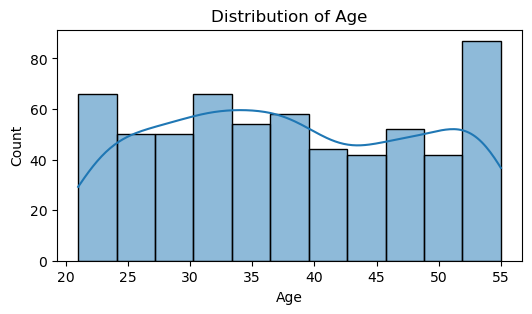

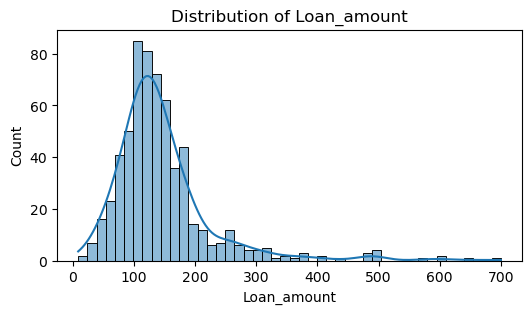

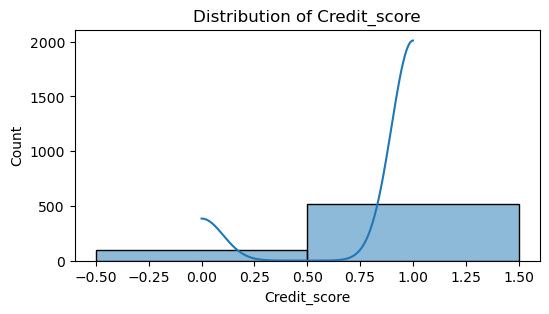

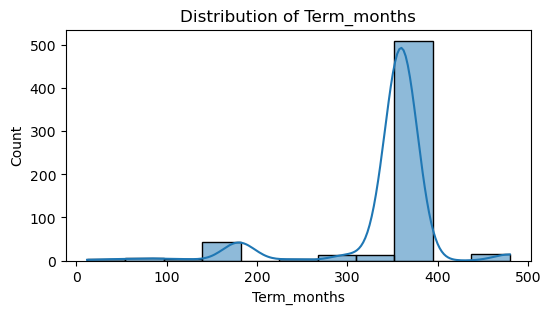

In [38]:
numerical_cols = ['Age', 'Loan_amount', 'Credit_score', 'Term_months']
for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

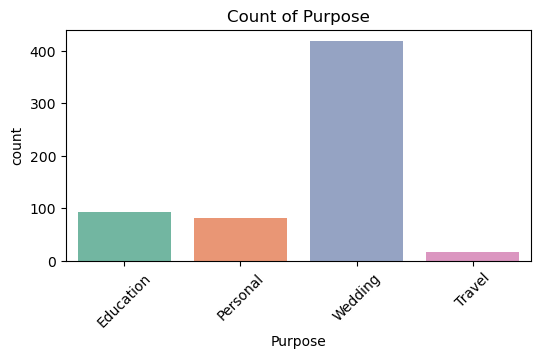

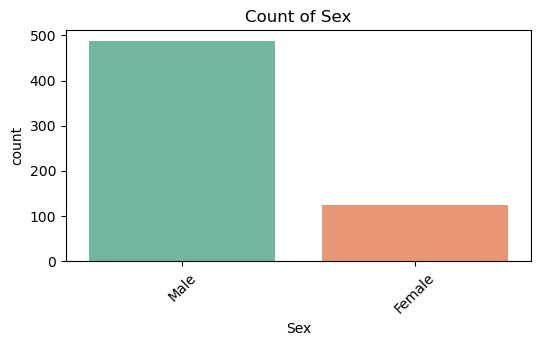

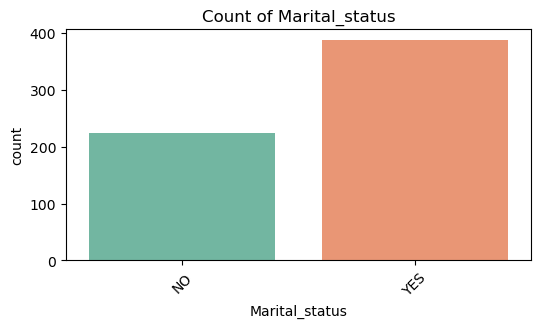

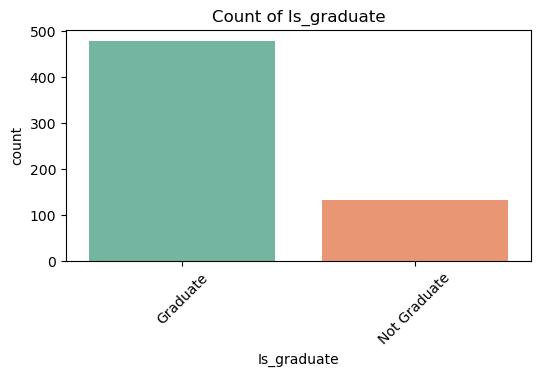

In [68]:
categorical_cols = ['Purpose','Sex', 'Marital_status', 'Is_graduate']

for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col,hue=col, palette='Set2', legend =False)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()